See if the xmm lightcurves are any good

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling import models, fitting
import lightkurve as lk
from astropy.coordinates import SkyCoord
from matplotlib.gridspec import GridSpec

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/'

In [3]:
fitsfiles = glob.glob(path+'*.FTZ')
fitsfiles

['/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301PNS001SRCTSR8001.FTZ',
 '/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301PNS001SRCTSR8002.FTZ',
 '/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301PNS001SRCTSR800F.FTZ',
 '/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301PNX000SRCTSR8001.FTZ',
 '/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301PNX000SRCTSR8002.FTZ',
 '/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301PNX000SRCTSR800F.FTZ',
 '/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301R1S004SRCTSR0001.FTZ',
 '/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301R2S005SRCTSR0001.FTZ']

In [6]:
for ft in fitsfiles:
    print (ft)
    data = fits.getdata(ft, 1)
    print(data.names)

/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301PNS001SRCTSR8001.FTZ
['TIME', 'RATE', 'ERROR', 'FRACEXP', 'BACKV', 'BACKE']
/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301PNS001SRCTSR8002.FTZ
['TIME', 'RATE', 'ERROR', 'FRACEXP', 'BACKV', 'BACKE']
/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301PNS001SRCTSR800F.FTZ
['TIME', 'RATE', 'ERROR', 'FRACEXP', 'BACKV', 'BACKE']
/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301PNX000SRCTSR8001.FTZ
['TIME', 'RATE', 'ERROR', 'FRACEXP', 'BACKV', 'BACKE', 'RATE1', 'RATE1_ERR', 'BACK1V', 'BACK1E', 'RATE2', 'RATE2_ERR', 'BACK2V', 'BACK2E', 'RATE3', 'RATE3_ERR', 'BACK3V', 'BACK3E', 'RATE4', 'RATE4_ERR', 'BACK4V', 'BACK4E', 'RATE5', 'RATE5_ERR', 'BACK5V', 'BACK5E', 'EXP_ID', 'TIMEDEL']
/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301PNX000SRCTSR8002.FTZ
['TIME', 'RATE', 'ERROR', 'FRACEXP', 'BACKV', 'BACKE', 'RATE1', 'RATE1_ERR

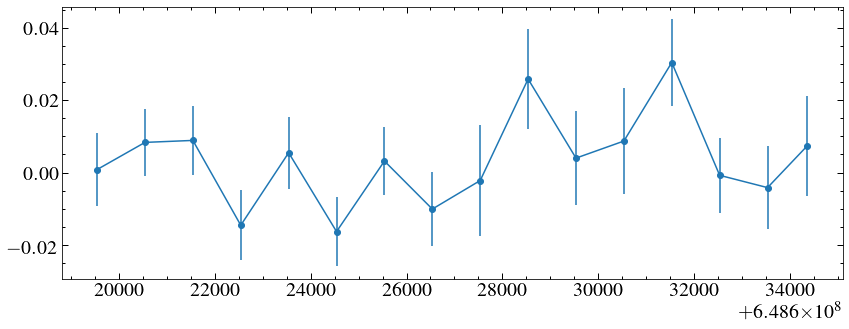

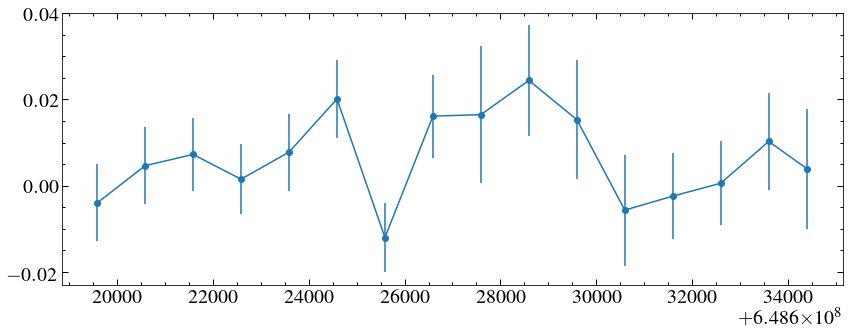

In [15]:
for ft in fitsfiles:
    inst = fits.getheader(ft, 1)['INSTRUME']
    #print(inst)
    if inst[:-1] =='RGS':
        data = fits.getdata(ft, 1)
        plt.errorbar(data['TIME'], data['RATE'], yerr=data['ERROR'], marker='o')
       # plt.hist(data['RATE'], bins=10)
        plt.show()

In [9]:
n

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   36 / width of table in bytes                        
NAXIS2  =                   16 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    8 / number of fields in each row                   
TTYPE1  = 'TIME    '           / Time                                           
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TUNIT1  = 's       '           / physical unit of field                         
TTYPE2  = 'RATE    '           / Count Rate                                     
TFORM2  = 'E       '        